# HW 6 Problem 2
## Austin Marga

Sections of this notebook were taken from the Jupyter Notebook `hubble.ipynb` </br> 
For some theory, the following was used. </br>
https://courses.lumenlearning.com/astronomy/chapter/the-age-of-the-universe/

First, our import statements.

In [1]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from least_square_fit import least_squares

Let's see what a least square fit of all 24 data points would look like. This is from the `hubble.ipynb` file provided to us in class.

In [2]:
# Make the plots a bit bigger to see
# NOTE: Must be done in a separate cell
plt.rcParams['figure.dpi'] = 100

 Least squares fit of 24 data points
 -----------------------------------
 Hubble's constant slope   b = 454.16 +-  75.24  km/s/Mpc
 Intercept with r axis     a = -40.78 +-  83.44  km/s
 Estimated v error bar sigma = 232.9 km/s
 numpy's values:           b = 454.16 +-  75.24  km/s/Mpc
                           a = -40.78 +-  83.44  km/s/Mpc


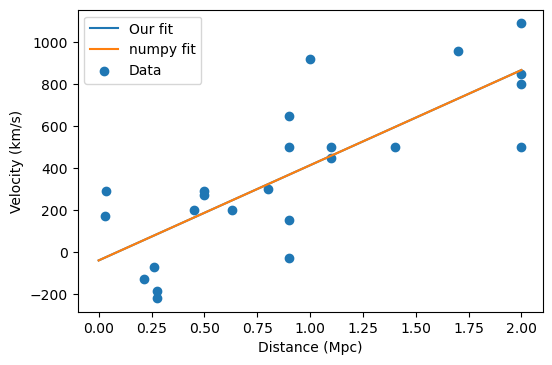

In [3]:
# distances in Mpc
r = np.array([ 0.032, 0.034, 0.214, 0.263, 0.275, 0.275, 0.45, 0.5,
      0.5,   0.63,  0.8,   0.9,   0.9,   0.9,   0.9,  1.0,
      1.1,   1.1,   1.4,   1.7,   2.0,   2.0,   2.0,  2.0 ])

# velocities in km/s
v = np.array([ +170, +290, -130, -70,  -185, -220, +200, +290,
      +270, +200, +300, -30,  +650, +150, +500, +920,
      +450, +500, +500, +960, +500, +850, +800, +1090 ])


n = len(r)   # number of galaxies

if n <= 2 :
    print ('Error! Need at least two data points!')
    exit()

# Use our home-grown version
[a, b, sigma, sigma_a, sigma_b] = least_squares(r,v)

# Check against numpy's version:
p,cov = np.polyfit( r, v, 1, cov=True)

# Print out results
print (' Least squares fit of', n, 'data points')
print (' -----------------------------------')
print (" Hubble's constant slope   b = {0:6.2f} +- {1:6.2f}  km/s/Mpc".format( b, sigma_b))
print (" Intercept with r axis     a = {0:6.2f} +- {1:6.2f}  km/s".format( a, sigma_a))
print (' Estimated v error bar sigma =', round(sigma, 1), 'km/s')
print (" numpy's values:           b = {0:6.2f} +- {1:6.2f}  km/s/Mpc".format( p[0], np.sqrt(cov[0,0])))
print ("                           a = {0:6.2f} +- {1:6.2f}  km/s/Mpc".format( p[1], np.sqrt(cov[1,1])))


rvals = np.linspace(0., 2.0, 21)
f = a + b * rvals
fnp = p[1] + p[0] * rvals
plt.figure(1)
plt.scatter( r, v, label = "Data" )
plt.plot( rvals, f , label="Our fit")
plt.plot( rvals, fnp, label = "numpy fit")
plt.xlabel("Distance (Mpc)")
plt.ylabel("Velocity (km/s)")
plt.legend()

plt.show()


We can see that we can group all 24 data points into 9 distinct groups. I choose these groups to be based on the $0.25$Mpc intervals. Points around each multiple of $0.25$Mpc are a group. </br> 
Example.
- The points with distance values of [ 0.032, 0.034] form a group.
- The points with distance values of [0.214, 0.263, 0.275, 0.275] form a group.
- The points with distance values of [0.45, 0.5, 0.5] form a group.
- The points with distance values of [0.63,  0.8] form a group.
And so on. If a point is within $.125$Mpc of a $0.25$Mpc interval, I will include it in the $0.25$Mpc interval group. I have made an exception around $1.00$Mpc, as that group would have seven members, and it is likely to better split it up into two groups.

First, we build a function to group our points given our conditions above.

In [4]:
def group(dist,vel):
    """
    Groups the distance,velocity points into 9 distinct groups.
    
    Args: dist and vel are lists.
    
    Returns: g is a list of groups (lists) of points (lists). Therefore, g is a list of list of lists.
    
    """
    g = [[],[],[],[],[],[],[],[],[]]
    a = 0
    for entry in dist:
        n = 0
        group_number = ((entry + 0.125) // .25)
        if (entry == 1.0 or entry == 1.1):
            group_number = 5.0
        val = [entry,vel[a]]
        a = a + 1
        g[int(group_number)].append(val)
    return g

In [5]:
group(r,v)

[[[0.032, 170], [0.034, 290]],
 [[0.214, -130], [0.263, -70], [0.275, -185], [0.275, -220]],
 [[0.45, 200], [0.5, 290], [0.5, 270]],
 [[0.63, 200], [0.8, 300]],
 [[0.9, -30], [0.9, 650], [0.9, 150], [0.9, 500]],
 [[1.0, 920], [1.1, 450], [1.1, 500]],
 [[1.4, 500]],
 [[1.7, 960]],
 [[2.0, 500], [2.0, 850], [2.0, 800], [2.0, 1090]]]

Then, we average the points for each of the groups.

In [6]:
def avg_point(group):
    """
    avg_point takes a group and averages the distance and velocity values of the points in the group.
    
    Args: group is a list of lists.
    
    Returns: new_point is a list.
    
    """
    new_point = []
    x = []
    y = []
    for point in group:
        x.append(point[0])
        y.append(point[1])
    avg_x = np.sum(x)/len(x)
    avg_y = np.sum(y)/len(y)
    new_point = [avg_x,avg_y]
    return new_point

In [7]:
avg_point([[0.032, 170], [0.034, 290]])

[0.033, 230.0]

Lastly, we assemble the points into a list and use this data set for our new linear fitting.

In [8]:
def make_points(dist,vel):
    """
    make_points makes a list of all averaged points using functions `group` and `avg_point`.
    
    Args: dist and vel are lists.
    
    Returns: [d_set,v_set] is a list of lists.
    
    """
    partition = group(r,v)
    d_set = []
    v_set = []
    for groupp in partition:
        pt = avg_point(groupp)
        d_set.append(pt[0])
        v_set.append(pt[1])
    return [d_set,v_set]

In [9]:
new_data_set = make_points(r,v)

Since the data set was very small, it was written directly in as a `numpy` array. Let's write this data of the averaged 9 points into a csv and fetch the data from the csv to cover the case that we will have a lot more data (which is very likely for future projects).

In [10]:
np.savetxt("hubble_data.csv", new_data_set, delimiter=",")

In [11]:
data2 = np.loadtxt("hubble_data.csv",delimiter=",")

In [12]:
data2.T

array([[ 3.30000000e-02,  2.30000000e+02],
       [ 2.56750000e-01, -1.51250000e+02],
       [ 4.83333333e-01,  2.53333333e+02],
       [ 7.15000000e-01,  2.50000000e+02],
       [ 9.00000000e-01,  3.17500000e+02],
       [ 1.06666667e+00,  6.23333333e+02],
       [ 1.40000000e+00,  5.00000000e+02],
       [ 1.70000000e+00,  9.60000000e+02],
       [ 2.00000000e+00,  8.10000000e+02]])

In [13]:
# distances in Mpc
r_o = data2[0]
# velocities in km/s
v_o = data2[1]

Now, let's perform the same analysis on these 9 averaged points as we did for the previous 24 point data set. Here, we plot the original scatter plot of the data, a `polyfit` and one using our `least_squares` function. Again, much of this format can be found in the original `hubble.ipynb` Notebook from in class.

 Least squares fit of 9 data points
 -----------------------------------
 Hubble's constant slope   b = 450.63 +-  93.92  km/s/Mpc
 Intercept with r axis     a =  -6.90 +- 106.67  km/s
 Estimated v error bar sigma = 175.2 km/s
 numpy's values:           b = 450.63 +-  93.92  km/s/Mpc
                           a =  -6.90 +- 106.67  km/s/Mpc


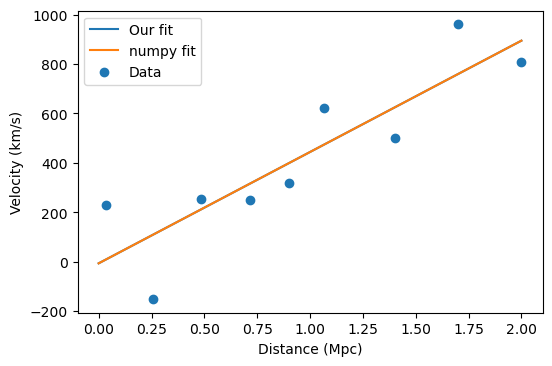

In [14]:
n = len(r_o)   # number of galaxies

if n <= 2 :
    print ('Error! Need at least two data points!')
    exit()

# Use our home-grown version
[a, b, sigma, sigma_a, sigma_b] = least_squares(r_o,v_o)

# Check against numpy's version:
p,cov = np.polyfit( r_o, v_o, 1, cov=True)

# Print out results
print (' Least squares fit of', n, 'data points')
print (' -----------------------------------')
print (" Hubble's constant slope   b = {0:6.2f} +- {1:6.2f}  km/s/Mpc".format( b, sigma_b))
print (" Intercept with r axis     a = {0:6.2f} +- {1:6.2f}  km/s".format( a, sigma_a))
print (' Estimated v error bar sigma =', round(sigma, 1), 'km/s')
print (" numpy's values:           b = {0:6.2f} +- {1:6.2f}  km/s/Mpc".format( p[0], np.sqrt(cov[0,0])))
print ("                           a = {0:6.2f} +- {1:6.2f}  km/s/Mpc".format( p[1], np.sqrt(cov[1,1])))


rvals = np.linspace(0., 2.0, 21)
f = a + b * rvals
fnp = p[1] + p[0] * rvals
plt.figure(1)
plt.scatter( r_o, v_o, label = "Data" )
plt.plot( rvals, f , label="Our fit")
plt.plot( rvals, fnp, label = "numpy fit")
plt.xlabel("Distance (Mpc)")
plt.ylabel("Velocity (km/s)")
plt.legend()

plt.show()


Given that Hubble's law tells us that:
</br>
$v = H_0d$
Therefore, we can get the age of the universe:
$v = \frac{d}{t}$
$t = \frac{d}{v} = \frac{d}{H_0d} = \frac{1}{H_0}$
Hubble's constant is given by $b = (450.63 \pm 93.92)$ km/s/Mpc </br>
After the unit conversions, we get 
$$H_0 = \frac{1}{b} = 2.17 \text{ billion years}$$
This is a far cry from the reported age of the universe however. The accepted value is closer to 15 billion years, but this within an order of magnitude. 